```
python -m clrs.examples.run --dataset_path ./  --seed 42 --algorithms bellman_ford --processor_type pgn \
--train_steps 30000
```

In [24]:
import numpy as np
!python ../clrs/examples/run.py --dataset_path ./  --seed 42 --algorithms bellman_ford --processor_type pgn

^C


In [319]:
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE, LocallyLinearEmbedding as LLE
import matplotlib.pyplot as plt
import pickle

In [345]:
def load(x):
    with open(x, 'rb') as file:
        return pickle.load(file)

def run_experiment(name: str, draw_paths = True):
    trajs = load(name)


    # Global plots
    trajs_squashed = trajs[:,1:,:].reshape((-1, 128))
    trajs_TSNE = TSNE(n_components=2, learning_rate='auto', init='random',perplexity=50).fit_transform(trajs_squashed)
    pca = PCA(n_components=2)
    trajs_PCA = pca.fit_transform(trajs_squashed)
    # trajs_HLLE = LLE(n_components=2, n_neighbors=30, method='hessian').fit_transform(trajs_squashed)

    fig, ax = plt.subplots(1, 2, figsize=(10, 4))

    for i in range(4):
        def plot_helper(j, x):
            ax[j].scatter(x[i:-1:4,0], x[i:-1:4,1], label=f'mp step {i+1}')
        plot_helper(0, trajs_TSNE)
        plot_helper(1, trajs_PCA)

    ax[0].legend()
    ax[0].set_title("T-SNE")
    ax[1].legend()
    ax[1].set_title(f"PCA ({100*np.sum(pca.explained_variance_ratio_):.2f}%)")

    # Stepwise plots

    # 2D PCA
    fig, ax = plt.subplots(1, 4, figsize=(16,4))
    fig.suptitle("PCA of latents after _ mp steps")
    for i in range(4):
        pca = PCA(n_components=2)
        trajs_reduced = pca.fit_transform(trajs[:,i+1,:])
        ax[i].set_title(f"{i+1} ({100*np.sum(pca.explained_variance_ratio_):.2f}%)")
        ax[i].scatter(trajs_reduced[:,0], trajs_reduced[:,1], c=np.arange(0,trajs.shape[0]), cmap='plasma')
        if draw_paths: ax[i].plot(trajs_reduced[:,0], trajs_reduced[:,1], alpha=0.1)


    # 3D PCA
    fig, ax = plt.subplots(1, 4, figsize=(16,4), subplot_kw=dict(projection='3d'))
    fig.suptitle("PCA of latents after _ mp steps")
    for i in range(4):
        pca = PCA(n_components=3)
        trajs_reduced = pca.fit_transform(trajs[:,i+1,:])
        ax[i].set_title(f"{i+1} ({100*np.sum(pca.explained_variance_ratio_):.2f}%)")
        ax[i].scatter3D(trajs_reduced[:,0], trajs_reduced[:,1], trajs_reduced[:,2], c=np.arange(0,trajs.shape[0]), cmap='plasma')
        if draw_paths: ax[i].plot3D(trajs_reduced[:,0], trajs_reduced[:,1], trajs_reduced[:,2], alpha=0.1)

    # 3D TSNE
    fig, ax = plt.subplots(1, 4, figsize=(16,4), subplot_kw=dict(projection='3d'))
    fig.suptitle("TSNE of latents after _ mp steps")
    for i in range(4):
        ax[i].set_title(f"{i+1}")
        trajs_reduced = TSNE(n_components=3, learning_rate='auto', init='random',perplexity=50)\
            .fit_transform(trajs[:,i+1,:])
        ax[i].scatter(trajs_reduced[:,0], trajs_reduced[:,1], trajs_reduced[:,2], c=np.arange(0,trajs.shape[0]), cmap='plasma')
        if draw_paths: ax[i].plot(trajs_reduced[:,0], trajs_reduced[:,1], trajs_reduced[:,2],  alpha=0.1)


# Without noise

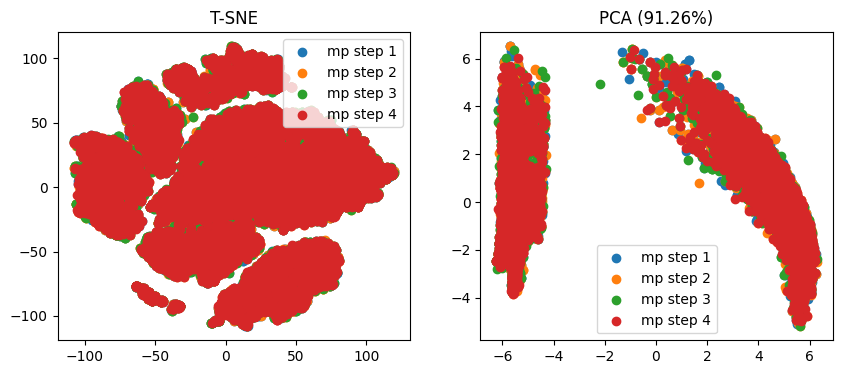

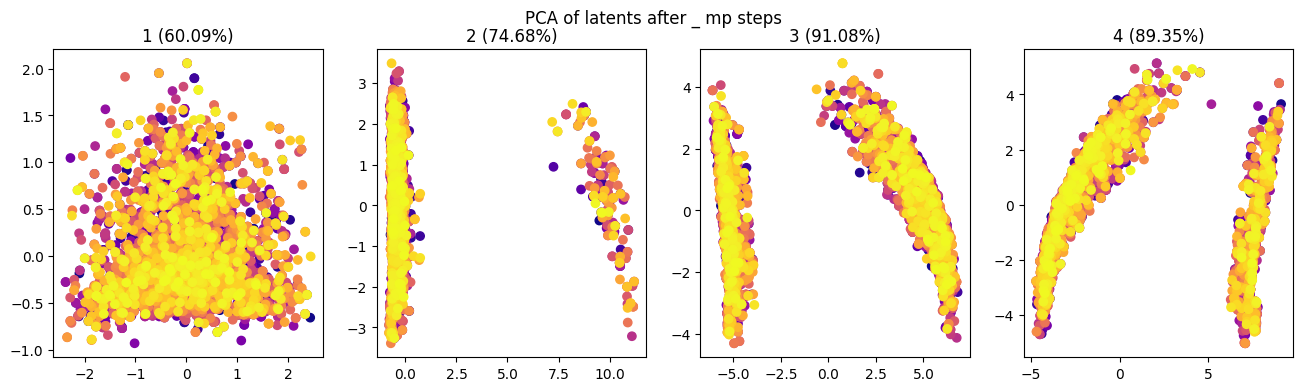

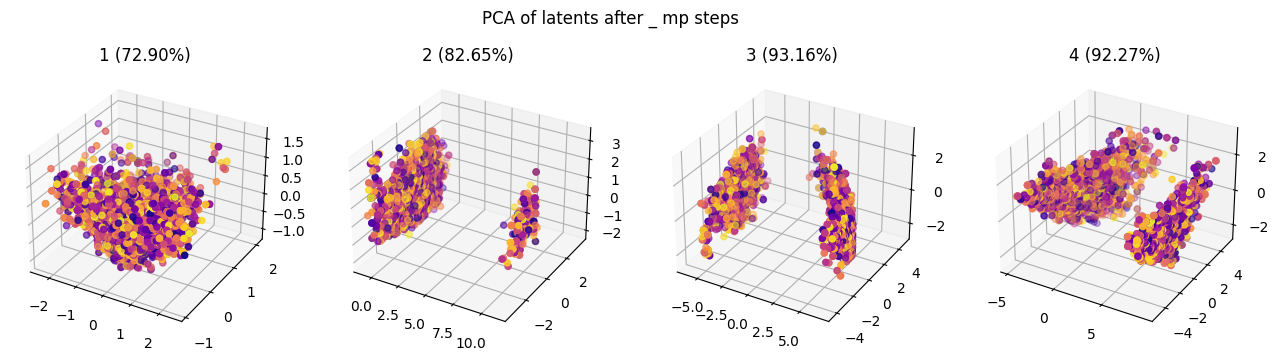

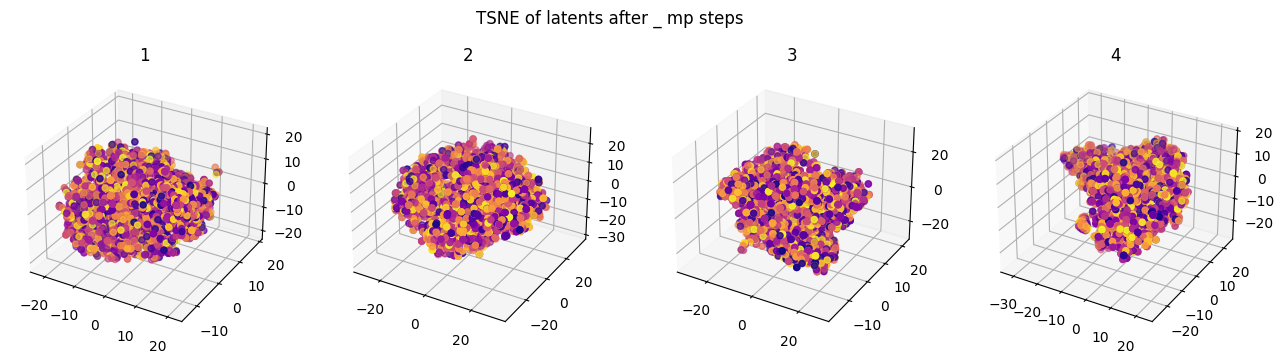

In [346]:
run_experiment('trajs_no_noise_random.pkl', draw_paths=False)

```jax.numpy.linspace(start=1, stop=2, num=1024)```

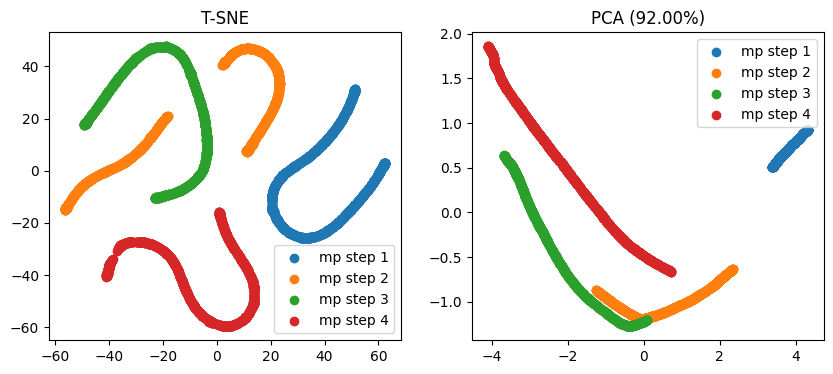

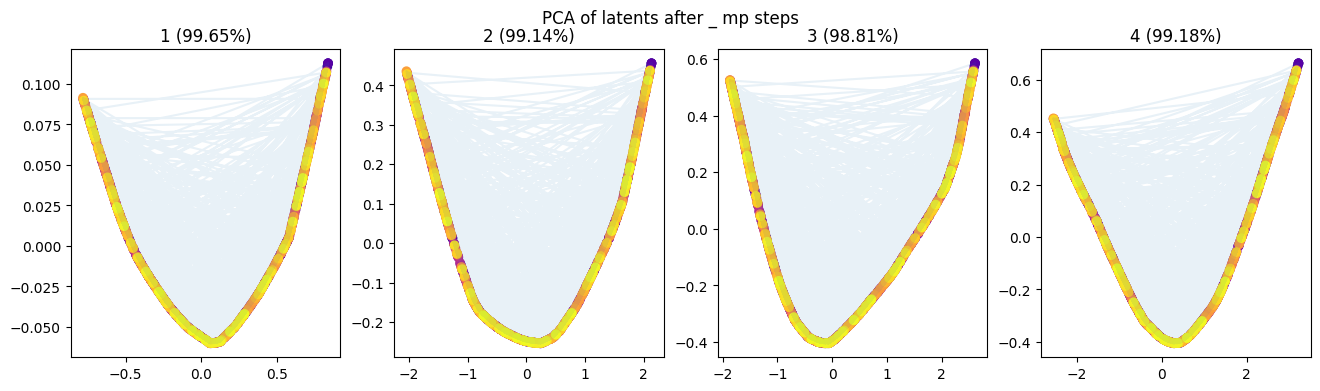

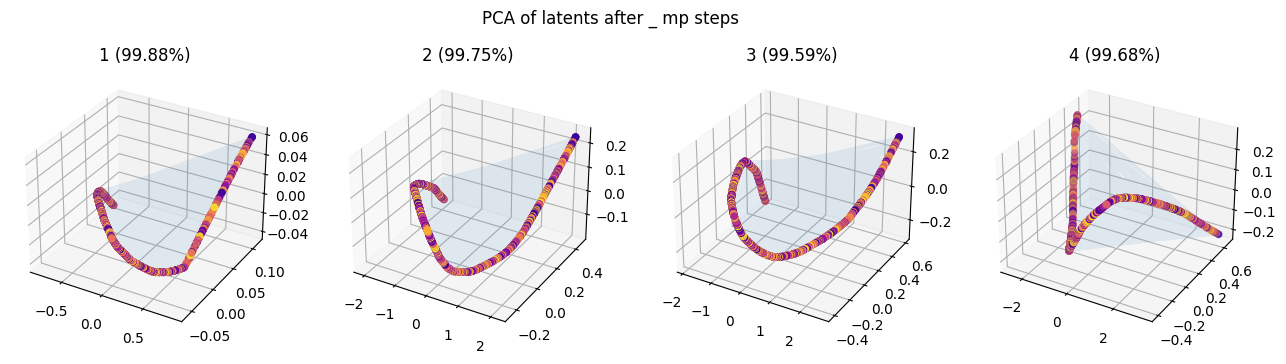

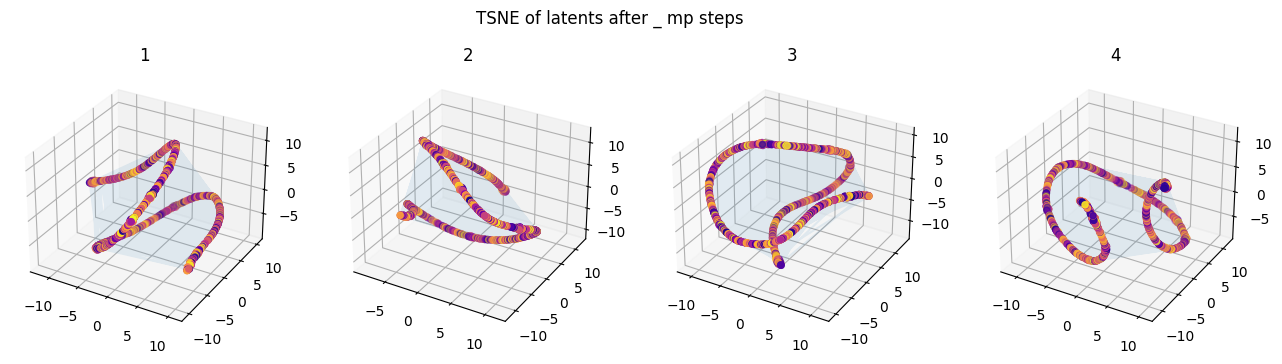

In [347]:
run_experiment('trajs_no_noise_linspace.pkl')

```jax.numpy.logspace(start=-5, stop=5, num=4096)```

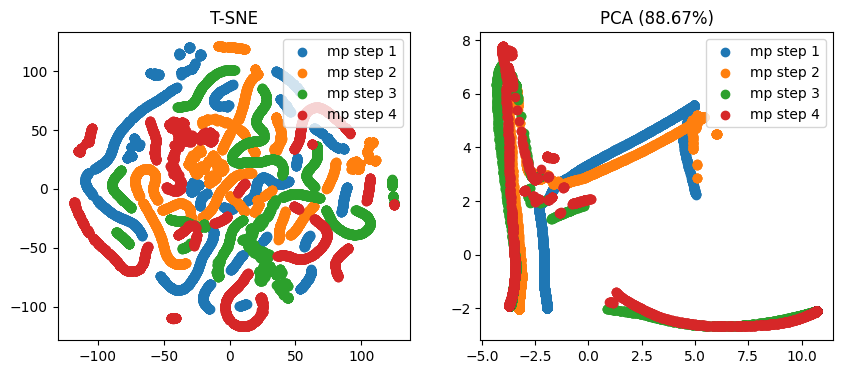

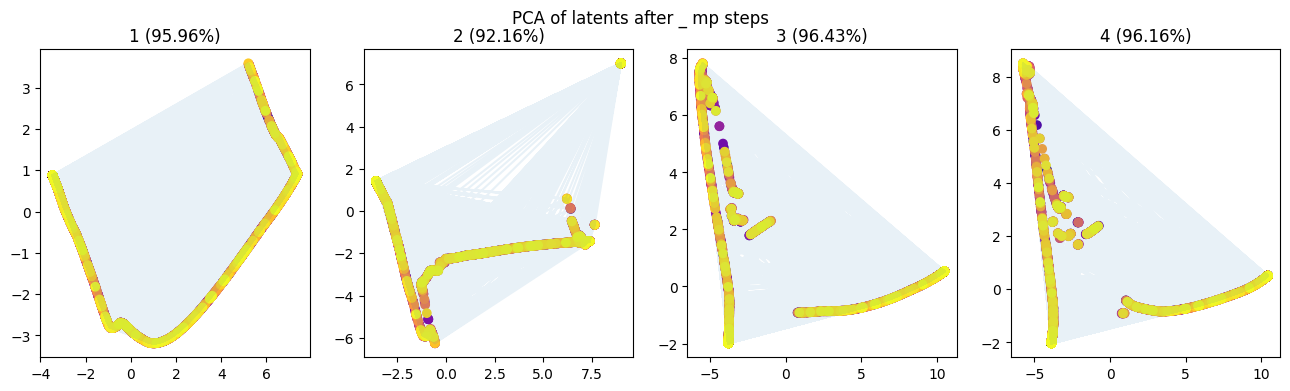

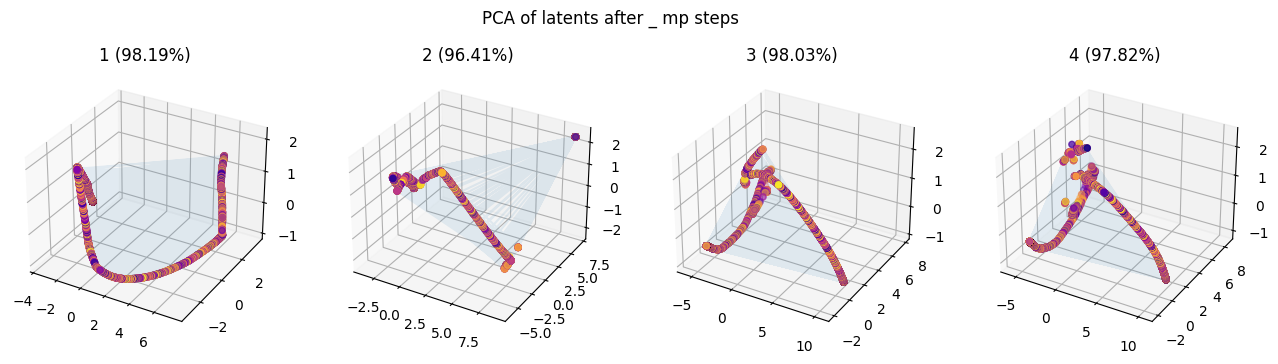

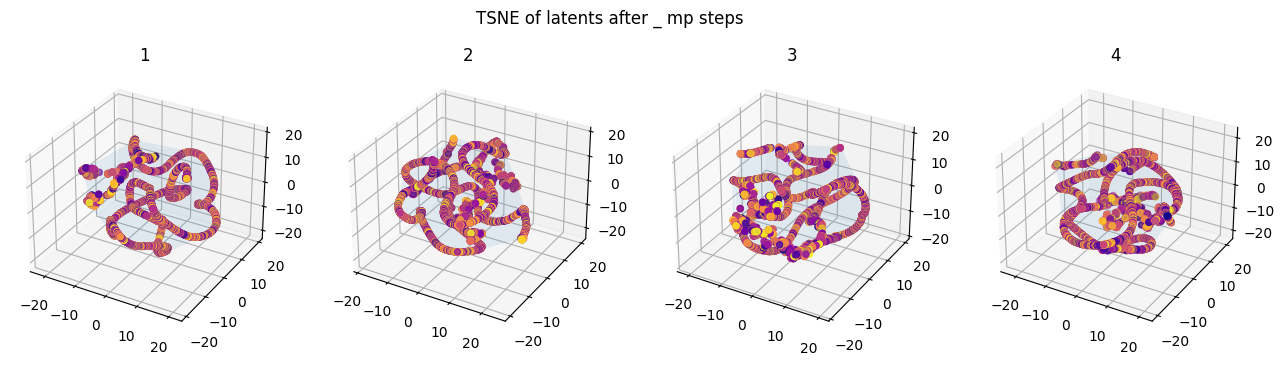

In [340]:
run_experiment('trajs_no_noise_logscale.pkl')

# With noise

In [337]:
from clrs._src.algorithms.graphs import bellman_ford

A = np.array([
    [0,1,0,0,0,0],
    [0,0,1,0,0,0],
    [0,0,0,1,0,0],
    [0,0,0,0,1,0],
    [0,0,0,0,0,1],
    [1,0,0,0,0,0]])

s = 0

pi, probes = bellman_ford(A, s)

print(pi)
print(probes)

[0 0 1 2 3 4]
{'input': {'node': {'pos': {'data': array([0.        , 0.16666667, 0.33333333, 0.5       , 0.66666667,
       0.83333333]), 'type_': 'scalar'}, 's': {'data': array([1., 0., 0., 0., 0., 0.]), 'type_': 'mask_one'}}, 'edge': {'A': {'data': array([[0, 1, 0, 0, 0, 0],
       [0, 0, 1, 0, 0, 0],
       [0, 0, 0, 1, 0, 0],
       [0, 0, 0, 0, 1, 0],
       [0, 0, 0, 0, 0, 1],
       [1, 0, 0, 0, 0, 0]]), 'type_': 'scalar'}, 'adj': {'data': array([[1., 1., 0., 0., 0., 0.],
       [0., 1., 1., 0., 0., 0.],
       [0., 0., 1., 1., 0., 0.],
       [0., 0., 0., 1., 1., 0.],
       [0., 0., 0., 0., 1., 1.],
       [1., 0., 0., 0., 0., 1.]]), 'type_': 'mask'}}, 'graph': {}}, 'output': {'node': {'pi': {'data': array([0, 0, 1, 2, 3, 4]), 'type_': 'pointer'}}, 'edge': {}, 'graph': {}}, 'hint': {'node': {'pi_h': {'data': array([[0, 1, 2, 3, 4, 5],
       [0, 0, 2, 3, 4, 5],
       [0, 0, 1, 3, 4, 5],
       [0, 0, 1, 2, 4, 5],
       [0, 0, 1, 2, 3, 5],
       [0, 0, 1, 2, 3, 4]]), 'type_'